In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import plotly.io as pio
pio.renderers.default = "browser"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.regression.quantile_regression import QuantReg

In [3]:
df = pd.read_csv("insurance.csv") 

In [4]:
df.shape

(1338, 7)

In [5]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
print(df.isnull().sum())  # Yayi Data doesnt have null values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# MLR with Regression Planes: Charges vs Age, BMI & Smoking

In [ ]:
import plotly.graph_objects as go
import statsmodels.api as sm
import pandas as pd
import numpy as np

mlr_data = df[['age', 'bmi', 'smoker', 'charges']].copy()
mlr_data['smoker_yes'] = (mlr_data['smoker'] == 'yes').astype(int)
X = mlr_data[['age', 'bmi', 'smoker_yes']]
X = sm.add_constant(X)
y = mlr_data['charges']
mlr_model = sm.OLS(y, X).fit()

fig = go.Figure()

non_smokers = df[df['smoker'] == 'no']
fig.add_trace(go.Scatter3d(
    x=non_smokers['age'],
    y=non_smokers['bmi'],
    z=non_smokers['charges'],
    mode='markers',
    marker=dict(size=4, color='lightblue', opacity=0.7),
    name='Non-smokers',
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

smokers = df[df['smoker'] == 'yes']
fig.add_trace(go.Scatter3d(
    x=smokers['age'],
    y=smokers['bmi'],
    z=smokers['charges'],
    mode='markers',
    marker=dict(size=4, color='darkblue', opacity=0.7),
    name='Smokers',
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

age_range = np.linspace(df['age'].min(), df['age'].max(), 20)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 20)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)

smoker_0 = np.zeros_like(age_grid.flatten())
X_pred_nonsmoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),                
    bmi_grid.flatten(),               
    smoker_0                           
])
z_pred_nonsmoker = mlr_model.predict(X_pred_nonsmoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_nonsmoker,
    colorscale='Blues', opacity=0.3,
    name='Non-smoker Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

smoker_1 = np.ones_like(age_grid.flatten())
X_pred_smoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),              
    bmi_grid.flatten(),               
    smoker_1                           
])
z_pred_smoker = mlr_model.predict(X_pred_smoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_smoker,
    colorscale='Reds', opacity=0.3,
    name='Smoker Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

fig.update_layout(
    title=f'MLR with Regression Planes: Charges vs Age, BMI & Smoking ',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Charges ($)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=900, height=700,
    # Make legend bigger and position it near the plot
    legend=dict(
        x=1.02,  # Position to the right of the plot
        y=0.8,   # Upper portion of the plot
        bgcolor="rgba(255,255,255,0.9)",  # White background
        bordercolor="rgba(0,0,0,0.8)",    # Dark border
        borderwidth=2,
        font=dict(size=18, color="black"),  # Large, bold font
        itemsizing="constant",
        itemwidth=50,  # Wider legend items
        tracegroupgap=15,  # More space between items
        title=dict(
            text="<b>Data Points & Planes</b>",
            font=dict(size=20, color="black")
        )
    )
)

fig.show()

print(f"MLR Model Summary:")
print(f"R-squared: {mlr_model.rsquared:.4f}")
print(f"Adjusted R-squared: {mlr_model.rsquared_adj:.4f}")
print("\nCoefficients:")
print(f"Intercept: ${mlr_model.params[0]:,.2f}")
print(f"Age: ${mlr_model.params[1]:,.2f} per year")
print(f"BMI: ${mlr_model.params[2]:,.2f} per unit")
print(f"Smoker: ${mlr_model.params[3]:,.2f} (smoker vs non-smoker)")


MLR Model Summary:
R-squared: 0.7475
Adjusted R-squared: 0.7469

Coefficients:
Intercept: $-11,676.83
Age: $259.55 per year
BMI: $322.62 per unit
Smoker: $23,823.68 (smoker vs non-smoker)


/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/1099849902.py:92: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/1099849902.py:93: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/1099849902.py:94: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/

## Quantile Regression

In [8]:

import plotly.graph_objects as go
from statsmodels.regression.quantile_regression import QuantReg

# Setup grid and quantiles
age_grid, bmi_grid = np.meshgrid(np.linspace(df['age'].min(), df['age'].max(), 15),
                                 np.linspace(df['bmi'].min(), df['bmi'].max(), 15))
quantiles = np.arange(0.05, 0.96, 0.05)

# Create figure with data points
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df[df['smoker']=='no']['age'], y=df[df['smoker']=='no']['bmi'], 
                          z=df[df['smoker']=='no']['charges'], mode='markers', 
                          marker=dict(size=3, color='lightblue', opacity=0.6), name='Non-smokers'))
fig.add_trace(go.Scatter3d(x=df[df['smoker']=='yes']['age'], y=df[df['smoker']=='yes']['bmi'], 
                          z=df[df['smoker']=='yes']['charges'], mode='markers', 
                          marker=dict(size=3, color='darkblue', opacity=0.6), name='Smokers'))

# Generate frames for each quantile
frames = []
for q in quantiles:
    qr = QuantReg(y, X).fit(q=q)
    # Non-smoker surface
    z_ns = qr.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                      bmi_grid.flatten(), np.zeros(age_grid.size)])).reshape(age_grid.shape)
    # Smoker surface  
    z_s = qr.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                     bmi_grid.flatten(), np.ones(age_grid.size)])).reshape(age_grid.shape)
    
    frames.append(go.Frame(data=[
        go.Scatter3d(x=df[df['smoker']=='no']['age'], y=df[df['smoker']=='no']['bmi'], 
                    z=df[df['smoker']=='no']['charges'], mode='markers', 
                    marker=dict(size=3, color='lightblue', opacity=0.6), name='Non-smokers'),
        go.Scatter3d(x=df[df['smoker']=='yes']['age'], y=df[df['smoker']=='yes']['bmi'], 
                    z=df[df['smoker']=='yes']['charges'], mode='markers', 
                    marker=dict(size=3, color='darkblue', opacity=0.6), name='Smokers'),
        go.Surface(x=age_grid, y=bmi_grid, z=z_ns, colorscale='Blues', opacity=0.5, 
                  name=f'Non-smoker τ={q:.2f}', showscale=False),
        go.Surface(x=age_grid, y=bmi_grid, z=z_s, colorscale='Reds', opacity=0.5, 
                  name=f'Smoker τ={q:.2f}', showscale=False)
    ], name=str(q)))

# Add initial surfaces (τ=0.5)
qr_init = QuantReg(y, X).fit(q=0.5)
z_ns_init = qr_init.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                            bmi_grid.flatten(), np.zeros(age_grid.size)])).reshape(age_grid.shape)
z_s_init = qr_init.predict(np.column_stack([np.ones(age_grid.size), age_grid.flatten(), 
                                           bmi_grid.flatten(), np.ones(age_grid.size)])).reshape(age_grid.shape)

fig.add_trace(go.Surface(x=age_grid, y=bmi_grid, z=z_ns_init, colorscale='Blues', 
                        opacity=0.5, name='Non-smoker τ=0.5', showscale=False))
fig.add_trace(go.Surface(x=age_grid, y=bmi_grid, z=z_s_init, colorscale='Reds', 
                        opacity=0.5, name='Smoker τ=0.5', showscale=False))

# Add frames and controls (without play/pause buttons)
fig.frames = frames
fig.update_layout(
    title='Interactive Quantile Regression: Drag Slider to Change τ',
    scene=dict(xaxis_title='Age', yaxis_title='BMI', zaxis_title='Charges ($)',
               camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))),
    width=900, height=700,
    sliders=[{
        'active': 9, 'currentvalue': {'prefix': 'Quantile (τ): '}, 'pad': {'t': 50},
        'steps': [{'args': [[q], {'frame': {'duration': 300, 'redraw': True}}], 
                  'label': f'{q:.2f}', 'method': 'animate'} for q in quantiles]
    }]
)

fig.show()
print("🎯 Interactive quantile regression ready! Drag the slider to explore different quantiles.")

/opt/anaconda3/envs/msds692/lib/python3.13/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



🎯 Interactive quantile regression ready! Drag the slider to explore different quantiles.


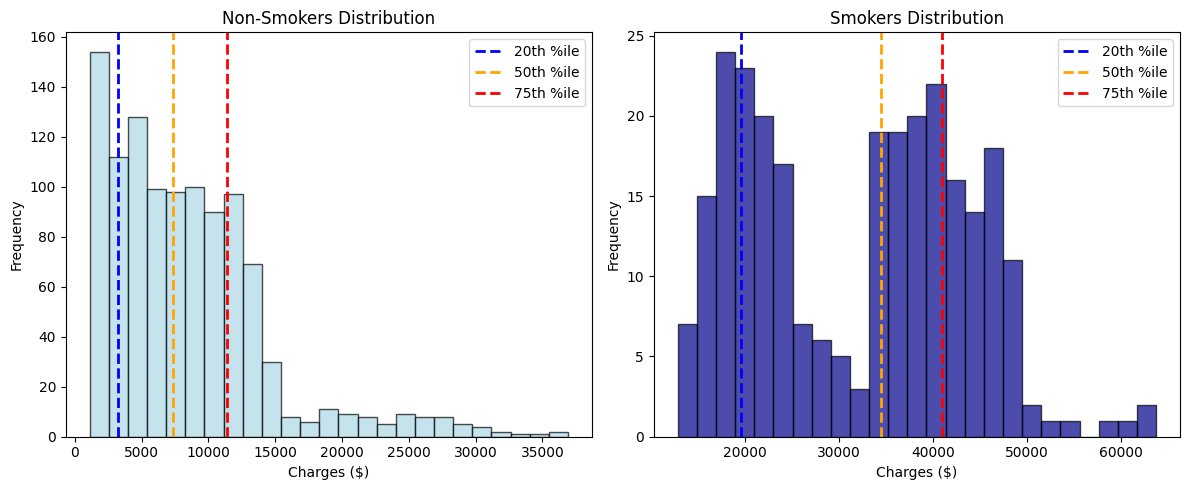

QUANTILE COMPARISON (20th, 50th, 75th percentiles):
Non-Smokers:
  20th percentile: $3,274
  50th percentile: $7,345
  75th percentile: $11,363
  Range (75th-20th): $8,089

Smokers:
  20th percentile: $19,519
  50th percentile: $34,456
  75th percentile: $41,019
  Range (75th-20th): $21,500

Key Insight:
Smokers have 2.7x larger range than non-smokers!


In [9]:
# Simplified Analysis: 20th, 50th, and 75th Percentiles
import matplotlib.pyplot as plt

# Get charges by smoking status
nonsmoker_charges = df[df['smoker'] == 'no']['charges']
smoker_charges = df[df['smoker'] == 'yes']['charges']

# Create side-by-side histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Non-smokers plot
ax1.hist(nonsmoker_charges, bins=25, alpha=0.7, color='lightblue', edgecolor='black')
ax1.axvline(nonsmoker_charges.quantile(0.2), color='blue', linestyle='--', linewidth=2, label='20th %ile')
ax1.axvline(nonsmoker_charges.quantile(0.5), color='orange', linestyle='--', linewidth=2, label='50th %ile') 
ax1.axvline(nonsmoker_charges.quantile(0.75), color='red', linestyle='--', linewidth=2, label='75th %ile')
ax1.set_title('Non-Smokers Distribution')
ax1.set_xlabel('Charges ($)')
ax1.set_ylabel('Frequency')
ax1.legend()

# Smokers plot
ax2.hist(smoker_charges, bins=25, alpha=0.7, color='darkblue', edgecolor='black')
ax2.axvline(smoker_charges.quantile(0.2), color='blue', linestyle='--', linewidth=2, label='20th %ile')
ax2.axvline(smoker_charges.quantile(0.5), color='orange', linestyle='--', linewidth=2, label='50th %ile')
ax2.axvline(smoker_charges.quantile(0.75), color='red', linestyle='--', linewidth=2, label='75th %ile')
ax2.set_title('Smokers Distribution')
ax2.set_xlabel('Charges ($)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

# Print simplified statistics
print("QUANTILE COMPARISON (20th, 50th, 75th percentiles):")
print("="*55)

# Non-smokers
q20_ns = nonsmoker_charges.quantile(0.2)
q50_ns = nonsmoker_charges.quantile(0.5) 
q75_ns = nonsmoker_charges.quantile(0.75)

print("Non-Smokers:")
print(f"  20th percentile: ${q20_ns:,.0f}")
print(f"  50th percentile: ${q50_ns:,.0f}")
print(f"  75th percentile: ${q75_ns:,.0f}")
print(f"  Range (75th-20th): ${q75_ns - q20_ns:,.0f}")

# Smokers  
q20_s = smoker_charges.quantile(0.2)
q50_s = smoker_charges.quantile(0.5)
q75_s = smoker_charges.quantile(0.75)

print("\nSmokers:")
print(f"  20th percentile: ${q20_s:,.0f}")
print(f"  50th percentile: ${q50_s:,.0f}")
print(f"  75th percentile: ${q75_s:,.0f}")
print(f"  Range (75th-20th): ${q75_s - q20_s:,.0f}")

print(f"\nKey Insight:")
print(f"Smokers have {(q75_s - q20_s)/(q75_ns - q20_ns):.1f}x larger range than non-smokers!")

In [13]:
import plotly.graph_objects as go
import statsmodels.api as sm
import pandas as pd
import numpy as np

mlr_data = df[['age', 'bmi', 'smoker', 'charges']].copy()
mlr_data['smoker_yes'] = (mlr_data['smoker'] == 'yes').astype(int)
X = mlr_data[['age', 'bmi', 'smoker_yes']]
X = sm.add_constant(X)
y = mlr_data['charges']
mlr_model = sm.OLS(y, X).fit()

fig = go.Figure()

non_smokers = df[df['smoker'] == 'no']
fig.add_trace(go.Scatter3d(
    x=non_smokers['age'],
    y=non_smokers['bmi'],
    z=non_smokers['charges'],
    mode='markers',
    marker=dict(size=4, color='lightblue', opacity=0.7),
    name='Non-smokers',
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

smokers = df[df['smoker'] == 'yes']
fig.add_trace(go.Scatter3d(
    x=smokers['age'],
    y=smokers['bmi'],
    z=smokers['charges'],
    mode='markers',
    marker=dict(size=4, color='darkblue', opacity=0.7),
    name='Smokers',
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

age_range = np.linspace(df['age'].min(), df['age'].max(), 20)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 20)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)

smoker_0 = np.zeros_like(age_grid.flatten())
X_pred_nonsmoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),                
    bmi_grid.flatten(),               
    smoker_0                           
])
z_pred_nonsmoker = mlr_model.predict(X_pred_nonsmoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_nonsmoker,
    colorscale='Blues', opacity=0.3,
    name='Non-smoker Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

smoker_1 = np.ones_like(age_grid.flatten())
X_pred_smoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),              
    bmi_grid.flatten(),               
    smoker_1                           
])
z_pred_smoker = mlr_model.predict(X_pred_smoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_smoker,
    colorscale='Reds', opacity=0.3,
    name='Smoker Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

fig.update_layout(
    title=f'MLR with Regression Planes: Charges vs Age, BMI & Smoking ',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Charges ($)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=900, height=700,
    # Enhanced legend configuration
    legend=dict(
        x=0.02,  # Position closer to the graph (left side)
        y=0.98,  # Near the top
        bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent white background
        bordercolor="rgba(0,0,0,0.5)",    # Light border
        borderwidth=1,
        font=dict(size=16),  # Larger font size
        itemsizing="constant",  # Consistent marker size in legend
        itemwidth=40,  # Wider legend items
        tracegroupgap=10  # More space between legend items
    )
)

fig.show()

print(f"MLR Model Summary:")
print(f"R-squared: {mlr_model.rsquared:.4f}")
print(f"Adjusted R-squared: {mlr_model.rsquared_adj:.4f}")
print("\nCoefficients:")
print(f"Intercept: ${mlr_model.params[0]:,.2f}")
print(f"Age: ${mlr_model.params[1]:,.2f} per year")
print(f"BMI: ${mlr_model.params[2]:,.2f} per unit")
print(f"Smoker: ${mlr_model.params[3]:,.2f} (smoker vs non-smoker)")

MLR Model Summary:
R-squared: 0.7475
Adjusted R-squared: 0.7469

Coefficients:
Intercept: $-11,676.83
Age: $259.55 per year
BMI: $322.62 per unit
Smoker: $23,823.68 (smoker vs non-smoker)


/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/670550390.py:104: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/670550390.py:105: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/670550390.py:106: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/

In [12]:
# MLR Visualization with Enhanced Legend for Better Color Differentiation
import plotly.graph_objects as go
import statsmodels.api as sm
import pandas as pd
import numpy as np

mlr_data = df[['age', 'bmi', 'smoker', 'charges']].copy()
mlr_data['smoker_yes'] = (mlr_data['smoker'] == 'yes').astype(int)
X = mlr_data[['age', 'bmi', 'smoker_yes']]
X = sm.add_constant(X)
y = mlr_data['charges']
mlr_model = sm.OLS(y, X).fit()

fig = go.Figure()

# Enhanced Non-smokers trace with better legend visibility
non_smokers = df[df['smoker'] == 'no']
fig.add_trace(go.Scatter3d(
    x=non_smokers['age'],
    y=non_smokers['bmi'],
    z=non_smokers['charges'],
    mode='markers',
    marker=dict(size=6, color='lightblue', opacity=0.8, line=dict(width=0.5, color='blue')),
    name='🔵 Non-smokers (Light Blue)',  # Enhanced name with emoji and color description
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

# Enhanced Smokers trace with better legend visibility
smokers = df[df['smoker'] == 'yes']
fig.add_trace(go.Scatter3d(
    x=smokers['age'],
    y=smokers['bmi'],
    z=smokers['charges'],
    mode='markers',
    marker=dict(size=6, color='darkblue', opacity=0.8, line=dict(width=0.5, color='navy')),
    name='🟦 Smokers (Dark Blue)',  # Enhanced name with emoji and color description
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Charges: $%{z:,.0f}<extra></extra>'
))

# Create prediction surfaces
age_range = np.linspace(df['age'].min(), df['age'].max(), 20)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 20)
age_grid, bmi_grid = np.meshgrid(age_range, bmi_range)

# Non-smoker plane
smoker_0 = np.zeros_like(age_grid.flatten())
X_pred_nonsmoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),                
    bmi_grid.flatten(),               
    smoker_0                           
])
z_pred_nonsmoker = mlr_model.predict(X_pred_nonsmoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_nonsmoker,
    colorscale='Blues', opacity=0.3,
    name='📈 Non-smoker Regression Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

# Smoker plane
smoker_1 = np.ones_like(age_grid.flatten())
X_pred_smoker = np.column_stack([
    np.ones(len(age_grid.flatten())),  
    age_grid.flatten(),              
    bmi_grid.flatten(),               
    smoker_1                           
])
z_pred_smoker = mlr_model.predict(X_pred_smoker).reshape(age_grid.shape)

fig.add_trace(go.Surface(
    x=age_grid, y=bmi_grid, z=z_pred_smoker,
    colorscale='Reds', opacity=0.3,
    name='📈 Smoker Regression Plane',
    showscale=False,
    hovertemplate='Age: %{x}<br>BMI: %{y:.1f}<br>Predicted: $%{z:,.0f}<extra></extra>'
))

# Enhanced layout with prominent legend
fig.update_layout(
    title=dict(
        text='MLR with Regression Planes: Charges vs Age, BMI & Smoking',
        font=dict(size=16)
    ),
    scene=dict(
        xaxis_title='Age',
        yaxis_title='BMI',
        zaxis_title='Charges ($)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=1000, height=700,  # Slightly wider to accommodate legend
    # ENHANCED LEGEND - Large, clear, and prominently positioned
    legend=dict(
        x=1.02,  # Right side of the plot
        y=0.9,   # Top portion
        bgcolor="rgba(255,255,255,0.95)",  # Nearly opaque white background
        bordercolor="rgba(0,0,0,1)",       # Solid black border
        borderwidth=3,                     # Thick border
        font=dict(size=16, color="black", family="Arial Black"),  # Large, bold font
        itemsizing="constant",
        itemwidth=60,    # Extra wide legend items
        tracegroupgap=20,  # Large spacing between items
        title=dict(
            text="<b>🔍 LEGEND - Data Points & Planes</b>",
            font=dict(size=18, color="darkblue")
        ),
        orientation="v"  # Vertical orientation
    )
)

fig.show()

print(f"MLR Model Summary:")
print(f"R-squared: {mlr_model.rsquared:.4f}")
print(f"Adjusted R-squared: {mlr_model.rsquared_adj:.4f}")
print("\nCoefficients:")
print(f"Intercept: ${mlr_model.params[0]:,.2f}")
print(f"Age: ${mlr_model.params[1]:,.2f} per year")
print(f"BMI: ${mlr_model.params[2]:,.2f} per unit")
print(f"Smoker: ${mlr_model.params[3]:,.2f} (smoker vs non-smoker)")
print("\n🎯 Legend Guide:")
print("🔵 Light Blue dots = Non-smokers")
print("🟦 Dark Blue dots = Smokers")

MLR Model Summary:
R-squared: 0.7475
Adjusted R-squared: 0.7469

Coefficients:
Intercept: $-11,676.83
Age: $259.55 per year
BMI: $322.62 per unit
Smoker: $23,823.68 (smoker vs non-smoker)

🎯 Legend Guide:
🔵 Light Blue dots = Non-smokers
🟦 Dark Blue dots = Smokers


/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/3527837134.py:119: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/3527837134.py:120: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn/T/ipykernel_24251/3527837134.py:121: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/5n/1q0msf196q96hmffxqznx8rm0000gn